<a href="https://colab.research.google.com/github/Hemantkumar023/Arima_Forecasting_for_traffic_prediction/blob/main/arima_model_traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Read Data

In [ ]:
df=pd.read_csv("/content/traffic.csv",parse_dates=['DateTime'],index_col='DateTime',infer_datetime_format=True)
print('Shape of data', df.shape)


Shape of data (48120, 3)


Dropping the unwanted columns

In [ ]:
df.drop(['ID','Junction'],axis=1,inplace=True)

Taking the observations from 1 to 1000


In [ ]:
df=df[1:1000]
df=df.dropna()
df.head()

,Vehicles
DateTime,
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9
2015-11-01 05:00:00,6


In [ ]:
df.tail()

,Vehicles
DateTime,
2015-12-12 11:00:00,15
2015-12-12 12:00:00,19
2015-12-12 13:00:00,16
2015-12-12 14:00:00,14
2015-12-12 15:00:00,14


Visualising the data

<Axes: xlabel='DateTime'>

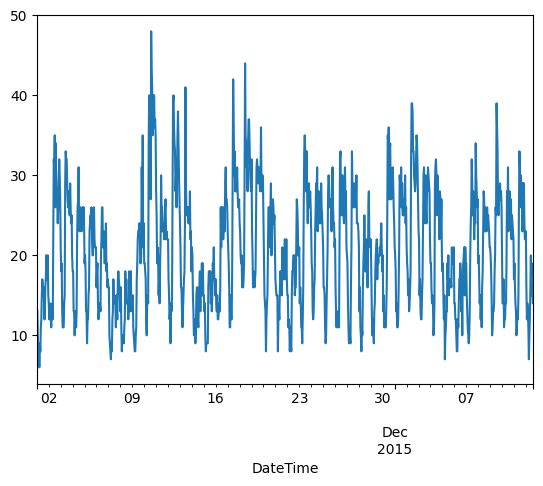

In [ ]:
df['Vehicles'].plot()

P-value check

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-value : ", dftest[1])
  print("3. Num of Lags : ", dftest[2])
  print("4. Num of observations used for ADF Regression:", dftest[3])
  print("5. Critical values : ")
  for key, val in dftest[4].items():
         print("\t",key, ": ", val)



In [ ]:
ad_test(df['Vehicles'])

1. ADF :  -2.5963298699110413
2. P-value :  0.09375818372236705
3. Num of Lags :  22
4. Num of observations used for ADF Regression: 976
5. Critical values : 
	 1% :  -3.4370678095881804
	 5% :  -2.8645058608075264
	 10% :  -2.568349178354273


Differencing the data as p>0.05

In [ ]:
df_diff = df.diff().dropna()

In [ ]:
df_diff.head()

,Vehicles
DateTime,
2015-11-01 02:00:00,-3.0
2015-11-01 03:00:00,-3.0
2015-11-01 04:00:00,2.0
2015-11-01 05:00:00,-3.0
2015-11-01 06:00:00,3.0


Differenced data

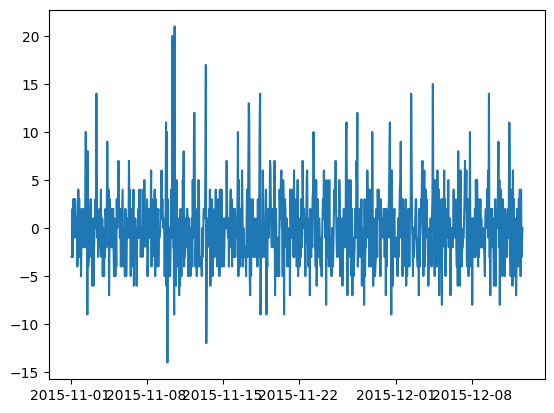

In [ ]:
plt.plot(df_diff)

Ad fuller test to check the p-value again

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-value : ", dftest[1])
  print("3. Num of Lags : ", dftest[2])
  print("4. Num of observations used for ADF Regression:", dftest[3])
  print("5. Critical values : ")
  for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [ ]:
ad_test(df_diff['Vehicles'])

1. ADF :  -17.86512572913655
2. P-value :  3.0426831981282183e-30
3. Num of Lags :  21
4. Num of observations used for ADF Regression: 976
5. Critical values : 
	 1% :  -3.4370678095881804
	 5% :  -2.8645058608075264
	 10% :  -2.568349178354273


Ignoring the warnings

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

Finding the best model

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_diff['Vehicles'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5519.935, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5528.448, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5530.304, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5530.326, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5526.448, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5523.656, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5524.428, Time=0.51 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5527.495, Time=1.02 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5528.592, Time=0.71 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.88 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.39 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5517.935, Time=1.70 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5521.656, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  998
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -2697.997
Date:                Wed, 12 Apr 2023   AIC                           5407.994
Time:                        18:07:31   BIC                           5437.429
Sample:                    11-01-2015   HQIC                          5419.183
                         - 12-12-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7590      0.033     54.061      0.000       1.695       1.823
ar.L2         -0.7223      0.054    -13.371      0.000      -0.828      -0.616
ar.L3         -0.1082      0.028     -3.928      0.000      -0.162      -0.054
ma.L1         -1.8943      0.019    -98.791      0.000      -1.932      -1.857
ma.L2          0.9241      0.019     48.486      0.000       0.887       0.961
sigma2        13.0277      0.405     32.149      0.000      12.233      13.822
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               406.41
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.80
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Training the model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df_diff.shape)
train=df_diff.iloc[:-50]
test=df_diff.iloc[-50:]
print(train.shape,test.shape)
train.head()

(998, 1)
(948, 1) (50, 1)


,Vehicles
DateTime,
2015-11-01 02:00:00,-3.0
2015-11-01 03:00:00,-3.0
2015-11-01 04:00:00,2.0
2015-11-01 05:00:00,-3.0
2015-11-01 06:00:00,3.0


Fitting the model

In [ ]:
import statsmodels.api as sm

In [ ]:
model= sm.tsa.arima.ARIMA(train["Vehicles"],order=(3,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Vehicles   No. Observations:                  948
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -2565.572
Date:                Wed, 12 Apr 2023   AIC                           5145.143
Time:                        18:07:35   BIC                           5179.124
Sample:                    11-01-2015   HQIC                          5158.091
                         - 12-10-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.055      0.137      0.891      -0.101       0.116
ar.L1          1.7566      0.034     51.174      0.000       1.689       1.824
ar.L2         -0.7216      0.056    -12.796      0.000      -0.832      -0.611
ar.L3         -0.1069      0.028     -3.764      0.000      -0.163      -0.051
ma.L1         -1.8913      0.020    -93.972      0.000      -1.931      -1.852
ma.L2          0.9206      0.020     45.924      0.000       0.881       0.960
sigma2        13.1015      0.441     29.726      0.000      12.238      13.965
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               412.82
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.82
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Plotting the model

<Axes: xlabel='DateTime'>

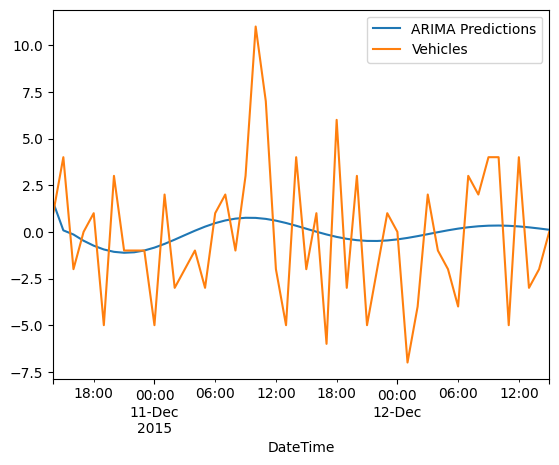

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Vehicles'].plot(legend=True)

Error calculation

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Vehicles'].mean()
rmse=sqrt(mean_squared_error(pred,test['Vehicles']))
print(rmse)

3.4948566473477527


In [ ]:
index_future_dates=pd.date_range(start='2015-11-01',end='2015-12-12')
pred=model.predict(start=len(df),end=len(df)+50,typ='levels').rename('ARIMA Predictions')
print(pred)

2015-12-12 17:00:00   -0.027353
2015-12-12 18:00:00   -0.089143
2015-12-12 19:00:00   -0.140709
2015-12-12 20:00:00   -0.179387
2015-12-12 21:00:00   -0.203515
2015-12-12 22:00:00   -0.212479
2015-12-12 23:00:00   -0.206680
2015-12-13 00:00:00   -0.187445
2015-12-13 01:00:00   -0.156882
2015-12-13 02:00:00   -0.117694
2015-12-13 03:00:00   -0.072963
2015-12-13 04:00:00   -0.025931
2015-12-13 05:00:00    0.020222
2015-12-13 06:00:00    0.062577
2015-12-13 07:00:00    0.098649
2015-12-13 08:00:00    0.126518
2015-12-13 09:00:00    0.144919
2015-12-13 10:00:00    0.153276
2015-12-13 11:00:00    0.151700
2015-12-13 12:00:00    0.140933
2015-12-13 13:00:00    0.122264
2015-12-13 14:00:00    0.097406
2015-12-13 15:00:00    0.068361
2015-12-13 16:00:00    0.037273
2015-12-13 17:00:00    0.006277
2015-12-13 18:00:00   -0.022635
2015-12-13 19:00:00   -0.047733
2015-12-13 20:00:00   -0.067646
2015-12-13 21:00:00   -0.081425
2015-12-13 22:00:00   -0.088578
2015-12-13 23:00:00   -0.089072
2015-12-

<Axes: >

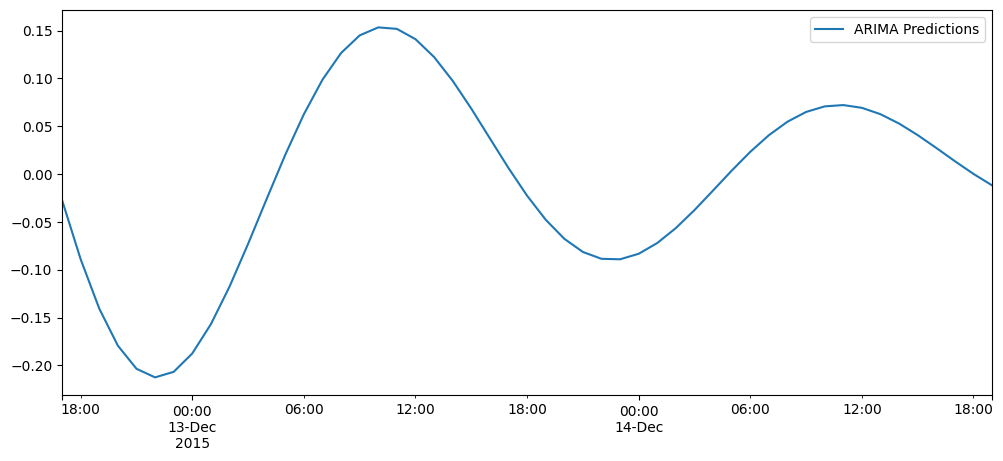

In [ ]:
pred.plot(figsize=(12,5), legend=True)

# New Section

# New Section